<a href="https://colab.research.google.com/github/mpedraza98/DSPS_MPedraza/blob/main/HW5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
t1 = pd.read_csv('https://raw.githubusercontent.com/fedhere/DSPS_FBianco/master/HW5/hbl2017.csv',sep=",",skiprows=1,names=["ID","x","y","sigy","sigx","pxy"])


In [3]:
t1.head()

,ID,x,y,sigy,sigx,pxy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33


Problem 1:

In [4]:
t1p1 = t1[t1["ID"]>=5]

In [5]:
Y = t1p1["y"]
X = t1p1["x"]
yerr = t1p1["sigy"]
A = np.c_[np.ones(len(X)), X]

In [6]:
theta_best = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(Y)
theta_best

array([28.84345193,  2.21665602])

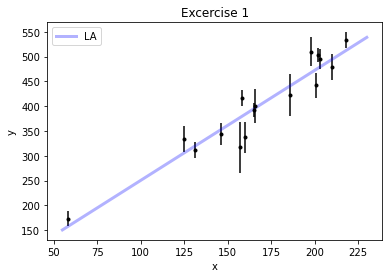

In [7]:
plt.errorbar(X,Y,yerr,fmt=".k",capsize=0)
x0 = np.linspace(55,230,10)
plt.plot(x0, theta_best[1] * x0 + theta_best[0], "b", 
         alpha=0.3, lw=3, label="LA")
plt.ylim
plt.title('Excercise 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Figure 1: Best fit line using standard linear algebra method based on x and y points, and showing uncertainties in the y direction with errorbars.

In [8]:
#To calculate the stadard uncertainty variance on the slope of the line:
A = np.vander(X, 2)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors
w = np.linalg.solve(ATA, np.dot(A.T, Y / yerr ** 2))
print("Uncertainty variance on m:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))

Uncertainty variance on m:
m = 2.240 ± 0.108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Problem 2:

In [9]:
Y = t1["y"]
X = t1["x"]
yerr = t1["sigy"]
A = np.c_[np.ones(len(X)),X]

In [10]:
theta_best = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(Y)
theta_best

array([310.01720255,   0.63201154])

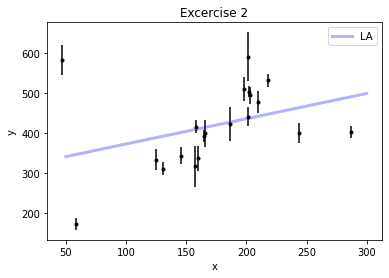

In [11]:
plt.errorbar(X,Y,yerr,fmt=".k",capsize=0)
x0 = np.linspace(50,300,10)
plt.plot(x0, theta_best[1] * x0 + theta_best[0], "b", 
         alpha=0.3, lw=3, label="LA")
plt.title('Excercise 2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Figure 2: Same as figure 1, but including all of the data points from table 1. 

In [12]:
A = np.vander(X, 2)
ATA = np.dot(A.T, A / (yerr ** 2)[:, None])
cov = np.linalg.inv(ATA) #covariance will give us the errors
w = np.linalg.solve(ATA, np.dot(A.T, Y / yerr ** 2))
print("Uncertainty variance on m:")
print("m = {0:.3f} ± {1:.3f}".format(w[0], np.sqrt(cov[0, 0])))

Uncertainty variance on m:
m = 1.077 ± 0.077


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Including the first few data points made a large difference in the slope of the line. It include outliers at the beginning and end of the x range that significantly reduced the slope, and made the line less representative of the majority of the points. 

Problem 3:

In [13]:
def quad_fit(x,y,yerr):
  A = np.c_[np.ones(len(x)),x,x**2]
  theta_best = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
  plt.errorbar(x,y,yerr,fmt=".k",capsize=0)
  x0 = np.linspace(50,300,10)
  plt.plot(x0, theta_best[2]*x0**2 + theta_best[1] * x0 + theta_best[0], "b", 
          alpha=0.3, lw=3, label="quadratic LA")
  plt.title('Excercise 3')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

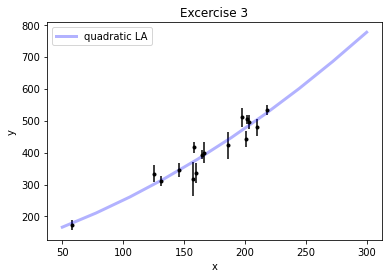

In [14]:
quad_fit(t1p1["x"],t1p1["y"],t1p1["sigy"])

Figure 3: Line-fitting as in figure 1, but using a general quadratic relationship. This fit seems so follow the data points slightly more closely than the linear fit, although the difference isn't that substantial because the data from exercise 1 are relatively linear. 